# Read dataset

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

## Read dataset from directory
dir_data = './data/'
raw_data = os.path.join(dir_data, 'crx.data')
data = np.genfromtxt(raw_data, delimiter=",", dtype=str)
label = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']

# Put txt files into DataFrame

In [2]:
arrange_data = []
for line in data:
    arrange_data.append(line)
    
df = pd.DataFrame(arrange_data)
df.columns = label

# processing with missimg value
df.replace('?', inplace=True)  # replace missing value with previous value

df=df.astype({'A2':'float32',
              'A3':'float32',
              'A8':'float32'})
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.830000,0.000,u,g,w,v,1.250,t,t,01,f,g,00202,0,+
1,a,58.669998,4.460,u,g,q,h,3.040,t,t,06,f,g,00043,560,+
2,a,24.500000,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.830000,1.540,u,g,w,v,3.750,t,t,05,t,g,00100,3,+
4,b,20.170000,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.080002,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.169998,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.920000,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.419998,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.500000,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


# Split training data & testing data

In [3]:
crx_data = df[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']]
crx_label = df['A16']
train_data , test_data , train_label , test_label = train_test_split(crx_data, crx_label, test_size=0.33, stratify=crx_label)
train_data

,A2,A3,A8,A11,A14,A15
56,23.170000,0.000,0.085,0,00000,0
155,21.670000,11.500,0.000,11,00000,0
476,23.580000,0.835,0.085,0,00220,5
294,16.080000,0.335,0.000,01,00160,126
344,38.919998,1.750,0.500,0,00300,2
72,38.580002,5.000,13.500,0,00980,0
473,19.170000,4.000,1.000,0,00360,1000
187,40.580002,5.000,5.000,07,00000,3065
397,23.580000,0.585,0.125,0,00120,87
7,22.920000,11.585,0.040,0,00080,1349


# KNN (K = 5)

In [4]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)
knn.fit(train_data,train_label)
pred = knn.predict(test_data)
accuracy = knn.score(test_data, test_label, sample_weight=None)

# Confusion matrix

In [5]:
print(confusion_matrix(test_label, pred))

[[ 59  42]
 [ 22 105]]


# Prediction

In [6]:
print(classification_report(test_label, pred))
print("Accuracy: ", accuracy)

              precision    recall  f1-score   support

           +       0.73      0.58      0.65       101
           -       0.71      0.83      0.77       127

   micro avg       0.72      0.72      0.72       228
   macro avg       0.72      0.71      0.71       228
weighted avg       0.72      0.72      0.71       228

Accuracy:  0.7192982456140351


# Compare the accuracy with different values of K

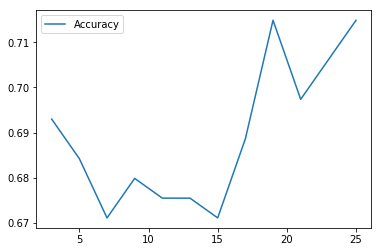

In [7]:
K_values = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
K_accuracy = []
for value in K_values:
    knn = KNeighborsClassifier(n_neighbors=value)
    knn.fit(train_data,train_label)
    K_accuracy.append(knn.score(test_data, test_label, sample_weight=None))

plt.plot(K_values, K_accuracy, label="Accuracy")
plt.legend()
plt.show()